# Titanic Analysis Practice

The primary targets of this practice:
1. Take this excercise as a preparation for kaggle competitions
2. Hands-on experience to data analysis, cleaning and modeling
3. Review visual analytic skills (matplotlib and seaborn)
4. Use interactive ploting module: plotly (taking a Udemy course now)

Let's do it!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

## Define the problem

The problem is to predict the survivals in titanic.

## Gather the Data

As the data is already given in the competition, all we need to do is to read them.

In [2]:
gender_submission = pd.read_csv('titanic/gender_submission.csv')
test_df = pd.read_csv('titanic/test.csv')
train_df = pd.read_csv('titanic/train.csv')

## Prepare Data

### Meet and greet data

In [3]:
print(train_df.info())
train_df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C


In [4]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cohen, Mr. Gurshon ""Gus""",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Understanding the data:

Column Name | Data Type | Comment
-----|----|-----
Survived| binary nominal| it's the training label for our estimator
PassengerId| nominal|it's a random number which is not helpful in the analysis
Name| nominal| it shows information like gender and title
Sex | nominal| need to be converted
Embarked| nominal| the place people embarked to the ship.need to be converted
Ticket| nominal | seems not useful
Cabin| nominal| lot's of missing data
Pclass| ordinal|as stated in kaggle, it stands for ticket class
Age| continuous quantitative datatypes|
Fare| continuous quantitative datatypes|
SibSp| discrete quantitative datatypes|number of siblings and spouses
Parch| discrete quantitative datatypes|number of parents and children



## The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

### Correcting
To see if there's any aberrant or non-acceptable data inputs.

In [5]:
# first, we create a copy of the original training dataset
# as we are now preparing for EDA so we call it df_EDA
df_EDA = train_df.copy()

df_EDA.drop(['PassengerId','Ticket'],axis=1,inplace=True)

### Completing

Check for null values or missing data.

In [6]:
# missing data
df_EDA.isnull().sum()[df_EDA.isnull().sum() != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

I see three columns with missing data. Let's analyse them one by one.

#### Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


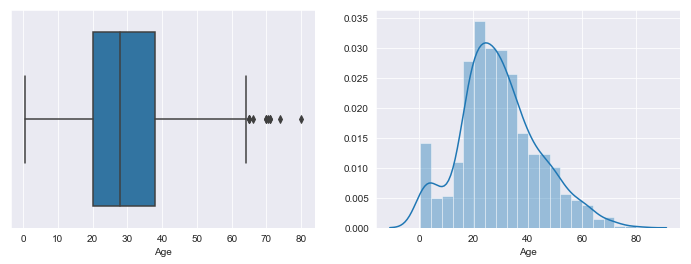

In [7]:
# stats info
print(df_EDA.Age.describe())

# shape of its distribution
f, axes = plt.subplots(1,2,figsize=(12,4))

sns.boxplot(df_EDA.Age.dropna(),ax=axes[0])
sns.distplot(df_EDA.Age.dropna(),ax=axes[1])

From the data and the graphs above, we can know that its a slightly right-skewed normal distribution. Taking the median to fill all the null value should be fine. *Wei: expectation maximization.*

Here, we save the train_df into another variable to leave the original df untouched for later sections.

So, we've done the filling! Let's see the data and graphs one more time to make sure the difference.

If all NA has been filled True
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


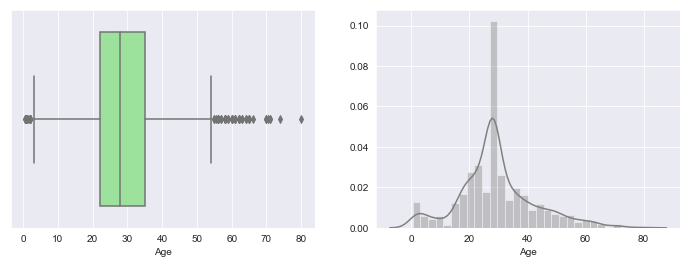

In [8]:
# then, we fill age with median
median_age = df_EDA.Age.median()
df_EDA.Age.fillna(median_age,inplace=True)

# Check if all NA has been filled
print('If all NA has been filled',df_EDA.Age.notnull().all())

# let's see the data and graphs one more time
f, axes = plt.subplots(1,2,figsize=(12,4))

sns.boxplot(df_EDA.Age,ax=axes[0],color='lightgreen')
sns.distplot(df_EDA.Age,ax=axes[1],color='grey')

print(df_EDA.Age.describe())

It seems after filling the Nan value, we create more outliers.

#### Cabin

Let's see the counts of values and the survival rate

In [9]:
df_with_cabin = df_EDA[df_EDA.Cabin.notnull()]

# Count the value of all record with Cabins
print(df_with_cabin.Survived.value_counts(),"\n")

# Let us see the survival rate
rate_of_survival_cabin = df_with_cabin.Survived.mean()
print("Survival Rate:","{:.0%}".format(rate_of_survival_cabin))

1    136
0     68
Name: Survived, dtype: int64 

Survival Rate: 67%


A survival rate of 66% is really high comparing to the benchmark! Remember that we have the overall survival rate of 38%. 

We already know that ticket fare and pclass are the most important factor, so I guess that only higher class people get their Cabin data recorded in the system. To prove the hypothesis, we will plot two figures with one containing all the data and another one containing only the data with Cabin info. We will see the differences in the plots below.

A little practice... =)

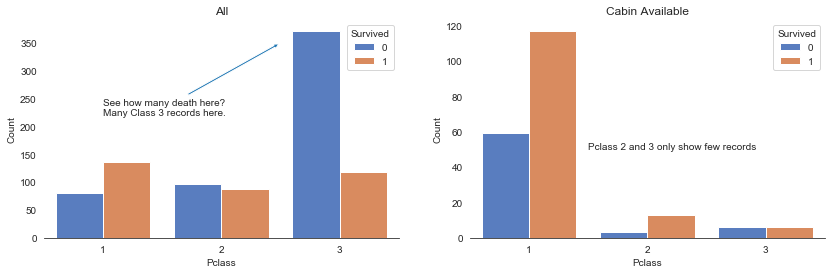

In [10]:
# style and background
# plt.style.use('seaborn-notebook')
sns.set_style("white")

# create another column for counting purpose
df_EDA['Count'] = 1
df_with_cabin['Count'] = 1

# figure and sizes
f, axes = plt.subplots(1,2,figsize=(14,4))

# all data
a1 = sns.barplot('Pclass','Count',hue='Survived',data=df_EDA,ax=axes[0],estimator=sum,palette='muted')
# data with Cabin available
a2 = sns.barplot('Pclass','Count',hue='Survived',data=df_with_cabin,ax=axes[1],estimator=sum,palette='muted')

# title
a1.set_title('All')
a2.set_title('Cabin Available')

# annotation and text
a1.annotate('See how many death here?\nMany Class 3 records here.',
            (1.5,350),
            (0.0,220),
            arrowprops=dict(arrowstyle = 'simple'))
a2.text(.5,50,
        'Pclass 2 and 3 only show few records')

# style
sns.despine(left=True, bottom=False)

Hypothesis proved. I can dig deeper into it but let's now focus on the topic. It seems to have a high correlation with the fare and pclass and it has many null values. To use that we need more digging and efforts, so we drop that.

In [11]:
df_EDA.drop(['Cabin'], axis=1, inplace=True)

# double check
df_EDA.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Count'],
      dtype='object')

#### Embarked

We got 2 missing value in the column Embarked. We fill it with the most common value in this column.

In [12]:
print('# of NA in Embarked: ',df_EDA.Embarked.isnull().sum())

df_EDA.Embarked.value_counts()

df_EDA.Embarked.fillna(df_EDA['Embarked'].mode()[0],inplace=True)

print('Are all the NAs has been filled: ', df_EDA.Embarked.notnull().all())

# of NA in Embarked:  2
Are all the NAs has been filled:  True


### Creating

1. Generate title from names.
2. Generate family size and single status from Parch and SibSp.
3. Create bins for fare and age for visualizations

In [13]:
# split the Name column twice to get the title
df_EDA['Title'] = df_EDA.Name.apply(lambda x: x.split(', ')[1].split('. ')[0])

# create a series with all the titles as the index and the boolean as the value
# the boolean shows if their counts are over 10, if they are not, they will be classified into Misc
title_names = df_EDA['Title'].value_counts() < 10

# use the series to transfer the column
df_EDA['Title'] = df_EDA['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

print(df_EDA['Title'].value_counts())

# create a column of family size and based on it, create another
df_EDA['FamilySize'] = df_EDA['Parch'] + df_EDA['SibSp'] + 1
df_EDA['IsAlone'] = df_EDA['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

df_EDA.head()

# create bins
df_EDA['FareBin'] = pd.qcut(df_EDA['Fare'], 4)
df_EDA['AgeBin'] = pd.cut(df_EDA['Age'].astype(int), 5)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


### Converting

In [14]:
# copy it
df_for_model = df_EDA.copy()

from sklearn.preprocessing import LabelEncoder

# transform the interval/category into code, for EDA purpose
label = LabelEncoder()
df_EDA['FareBin_Code'] = label.fit_transform(df_EDA.FareBin)
df_EDA['AgeBin_Code'] = label.fit_transform(df_EDA.AgeBin)
df_EDA['Sex_Code'] = label.fit_transform(df_EDA['Sex'])
df_EDA['Embarked_Code'] = label.fit_transform(df_EDA['Embarked'])
df_EDA['Title_Code'] = label.fit_transform(df_EDA['Title'])

df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
Count         891 non-null int64
Title         891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(7), object(4)
memory usage: 92.5+ KB


In [15]:
# converting categorical data into one-hot columns
import patsy as pts

y, X = pts.dmatrices('Survived ~ Pclass + C(Sex) + Age + SibSp + Parch + Fare + ' +
                    'C(Embarked) + C(Title) + FamilySize + IsAlone', data=df_for_model,
                    return_type='dataframe')
pd.concat([X,y]).info()

from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1782 entries, 0 to 890
Data columns (total 16 columns):
Age                 891 non-null float64
C(Embarked)[T.Q]    891 non-null float64
C(Embarked)[T.S]    891 non-null float64
C(Sex)[T.male]      891 non-null float64
C(Title)[T.Misc]    891 non-null float64
C(Title)[T.Miss]    891 non-null float64
C(Title)[T.Mr]      891 non-null float64
C(Title)[T.Mrs]     891 non-null float64
FamilySize          891 non-null float64
Fare                891 non-null float64
Intercept           891 non-null float64
IsAlone             891 non-null float64
Parch               891 non-null float64
Pclass              891 non-null float64
SibSp               891 non-null float64
Survived            891 non-null float64
dtypes: float64(16)
memory usage: 236.7 KB


## Exploratory Data Analysis



Take a quick look of the pairplot and see what we can get.

As pairplot will not show categorical information, we are looking at numerical data.

0    62%
1    38%
Name: Survived, dtype: object


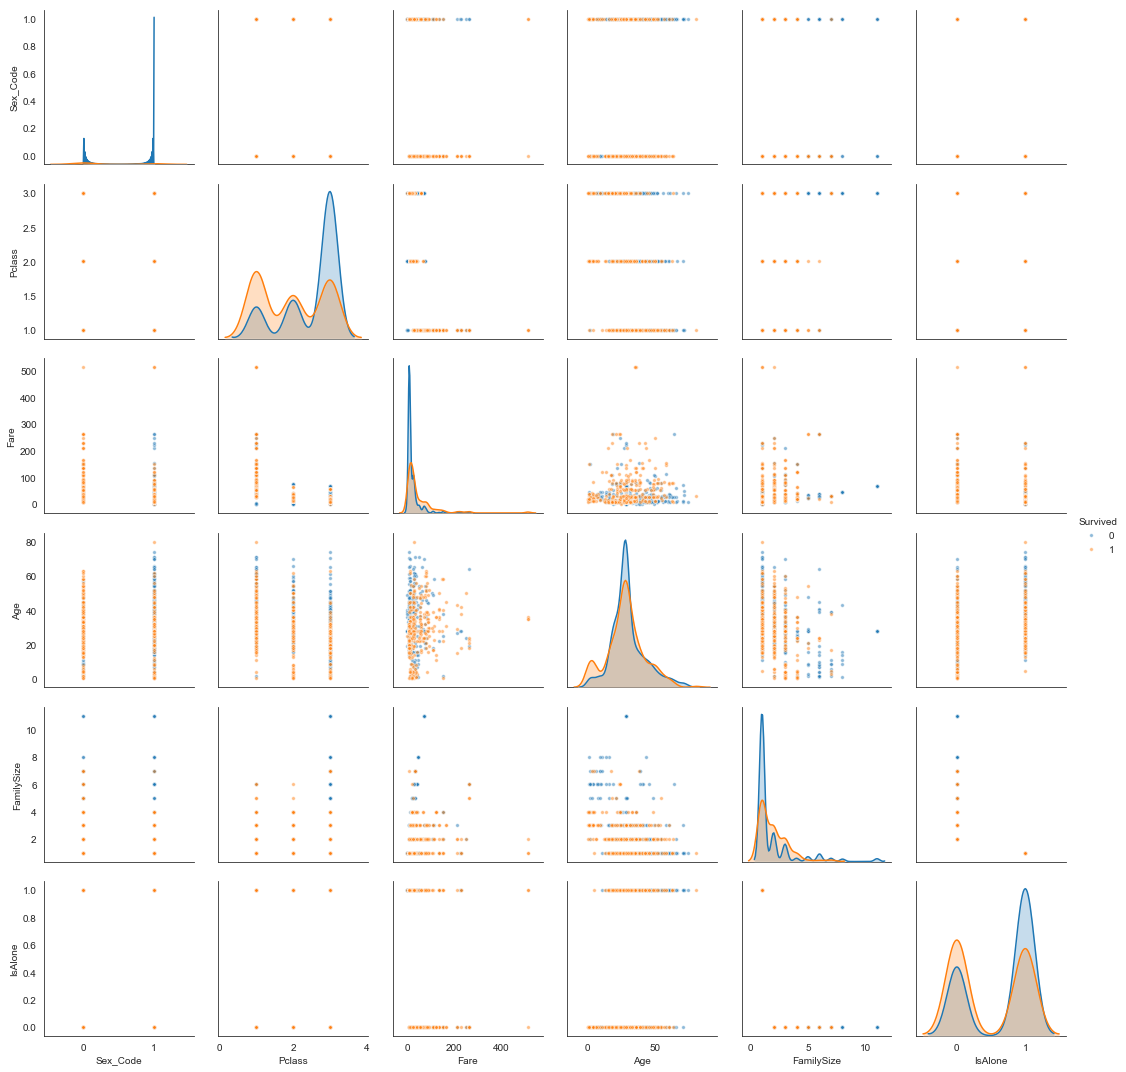

In [16]:
g = sns.pairplot(df_EDA, hue='Survived', plot_kws={'alpha':0.5,'s':13},
             vars=['Sex_Code','Pclass','Fare','Age',\
                   'FamilySize', 'IsAlone'])

print(df_EDA.Survived.value_counts(normalize=True).apply(lambda x: '{:.0%}'.format(x)))

Diagonal:
- Fare: a clear peak along the blue line can be seen which means the fatalities are mainly distributed in the low-fare area.
- Age: Children has a higher rate to survive. Mid-age people probably sacrificed themselves?
- Sex: Apparently, women are much more likely to survive than man
- Class: Higher class passenger has a lower rate of death
- Is Alone: stick with family to gain higher survival rate
- Family Size: Don't be alone and don't take too many family friends...

Upper/lower plots:
can't see any thing.

Lastly, remember that we have 38% total survival rate.

### Single and Multi Variable Analysis
#### Fare and Pclass

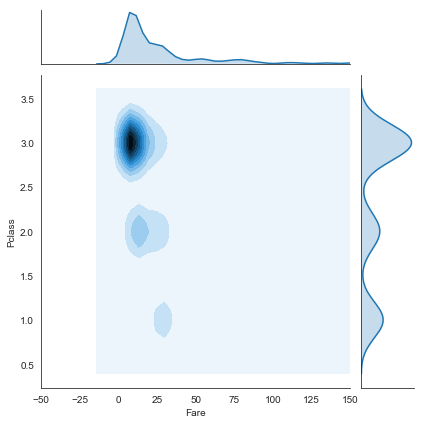

In [17]:
sns.set_style('white')

a = sns.jointplot(df_EDA['Fare'], df_EDA['Pclass'],  kind="kde", xlim=(-50,150))

sns.despine()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


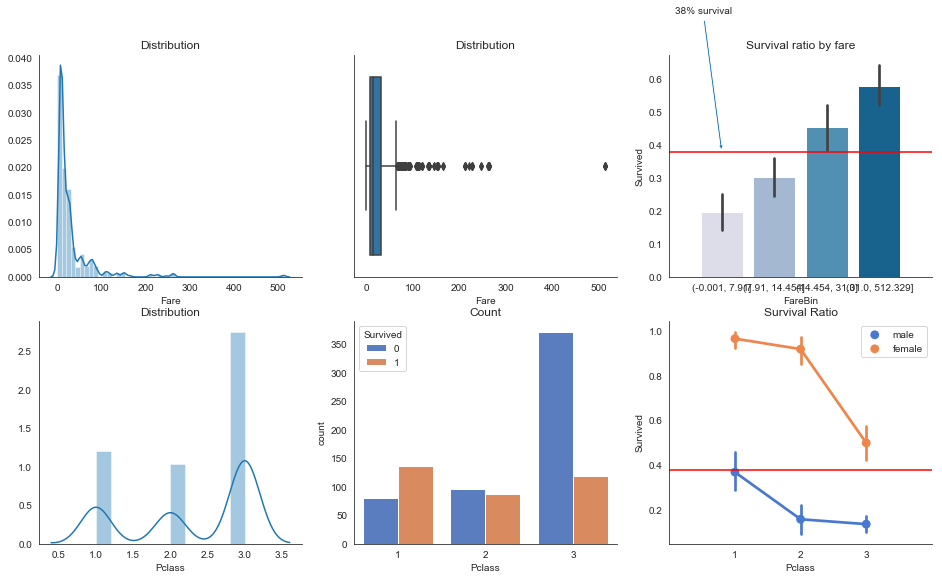

In [18]:
fig, a = plt.subplots(2,3,figsize=(16,9))

ax0 = sns.distplot(df_EDA.Fare, ax=a[0,0])
ax1 = sns.boxplot(df_EDA.Fare, ax=a[0,1])
ax2 = sns.barplot('FareBin', 'Survived', data=df_EDA, palette='PuBu',ax=a[0,2])
sns.lineplot([x for x in range(-1,6)], 0.38, color='red',ax=a[0,2])

ax0.set_title('Distribution')
ax1.set_title('Distribution')
ax2.set_title('Survival ratio by fare')
ax2.set_xlim(-1,4)
ax2.annotate('38% survival',
            (0,.38),
            (-.9,.8),
            arrowprops=dict(arrowstyle = 'simple'))

a1 = sns.distplot(df_EDA.Pclass,ax=a[1,0])
a2 = sns.countplot('Pclass', hue='Survived', data=df_EDA, palette="muted",ax=a[1,1])
a3 = sns.pointplot('Pclass', 'Survived', data=df_EDA, palette='muted',hue='Sex',ax=a[1,2])
sns.lineplot([x for x in range(-1,4)], 0.38, color='red',ax=a[1,2])

a1.set_title('Distribution')
a2.set_title('Count')
a3.set_title('Survival Ratio')
a3.set_xlim(-1,3)

sns.despine()
print(df_EDA.Fare.describe())

**Fare Price**
1. Distribution Plot: 

Most people paid 7.91 ~ 31.00 for the ticket, while some paid a lot of money like 512.32... We can see there are some outliers in the box plot. From the stats data showed above, we know that the mean value is influenced by the outliers, and the std is quite high possibly for the same reason. 


2. Line and Bar Plot: 

In the graph, we have 4 groups of bins, and each of them has exactly the same number as each other because we cut the fare using Quantile-based discretization function.

As expected, we found that the more money paid for the ticket, the higher survival rate it will be. 

**Pclass**
1. Most people are in class 3
2. Only class 1 has the survival rate > 50%
3. Class 3 has a low survival rate

Expected. Same reason as fare price.

**Sex**
1. Women > men.
2. Even a first class man, his survival rate < 38%.

Gentle man. My greatest respect.

#### Age and Pclass

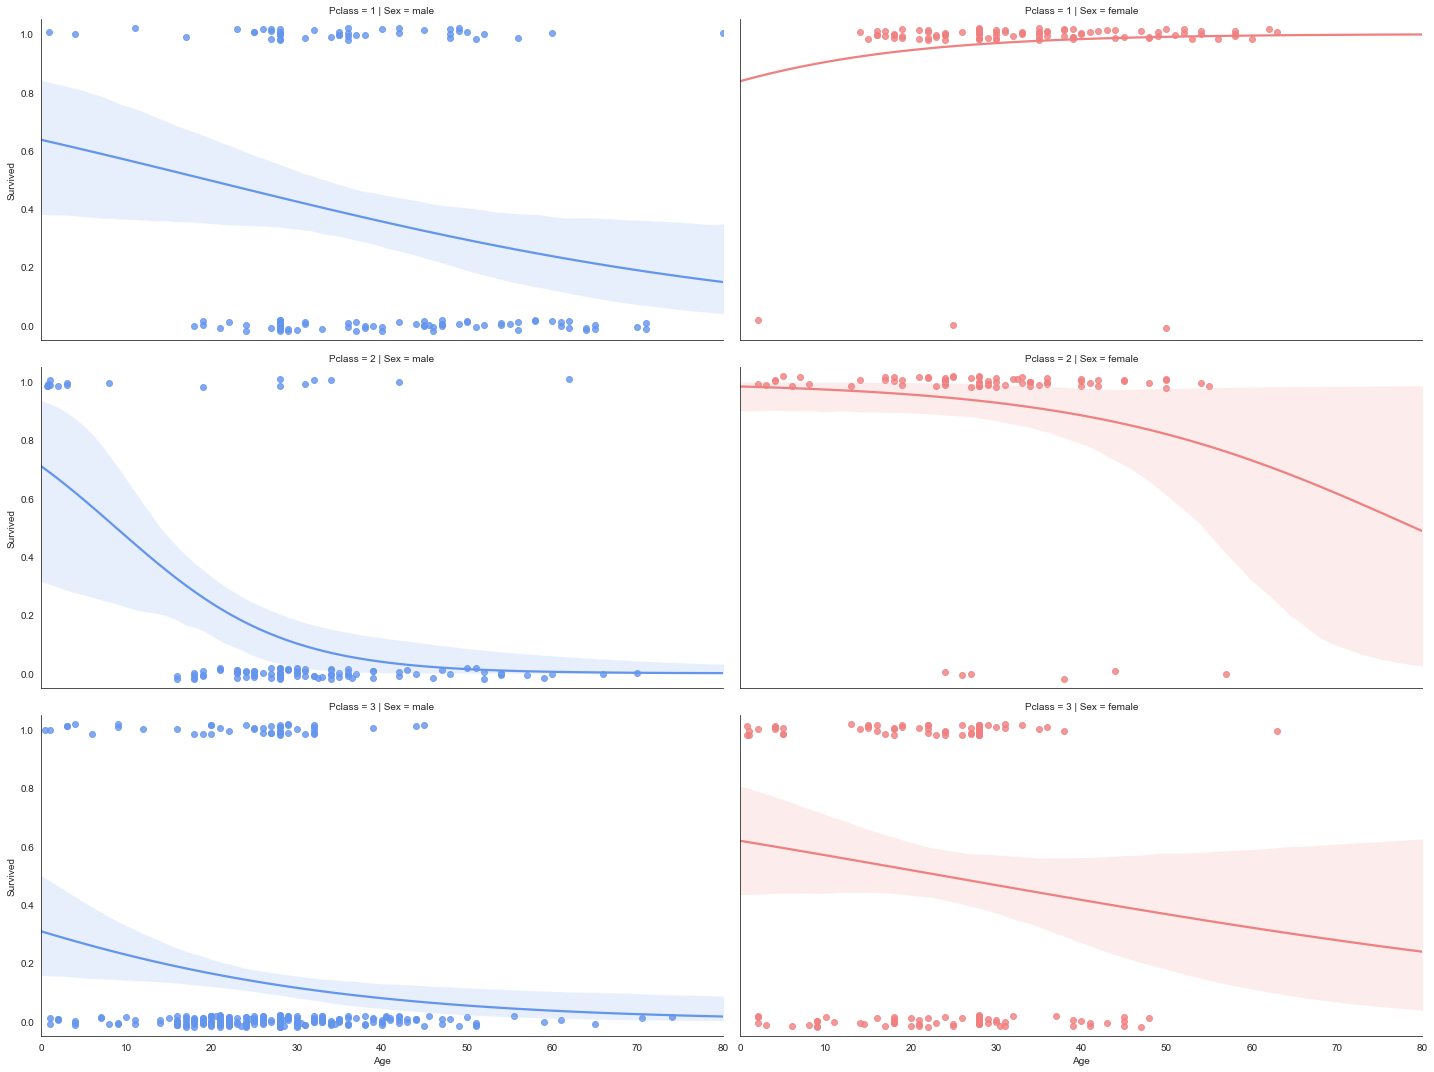

In [19]:
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="Age", y="Survived", row = 'Pclass', col="Sex", hue="Sex", data=df_EDA, aspect=2,
               palette=pal, y_jitter=.02, logistic=True)

g.set(xlim=(0, 80), ylim=(-.05, 1.05))

**Regression Plot**
- Most ladies in class one were saved
- Older ladies in class 2 have a chance to be abandoned
- Boys in Class 2 have a high rate of survival
- As the age increases, the rate of survival decreases (for most cases)
- Class 3 sucks

#### Ticket

This is a tricky one and I don't wanna go too deep on that, but let's try it anyway. From the numbers, we can know the sequence of booking and something more, but I really don't think this will contribute much on the analysis. 

Instead, let's see what's the survival rate for different strings included in the ticket.

In [20]:
# replacing all digit with empty strings, and show the result
def replace_digit(x):
    result = ""
    for i in x:
        if not i.isdigit():
            result = "".join([result,i])
    return result.strip()

# save the result in a variable
converted_ticket = train_df['Ticket'].apply(replace_digit)

# create a slicer including top 5 values of the above variable
slicer = train_df['Ticket'].apply(replace_digit).value_counts().index[:5]

Testing for 
Number of data: 661
P(Survival) = 38%
--------------------
Testing for PC
Number of data: 60
P(Survival) = 65%
--------------------
Testing for C.A.
Number of data: 27
P(Survival) = 48%
--------------------
Testing for A/
Number of data: 13
P(Survival) = 8%
--------------------
Testing for STON/O .
Number of data: 12
P(Survival) = 42%
--------------------


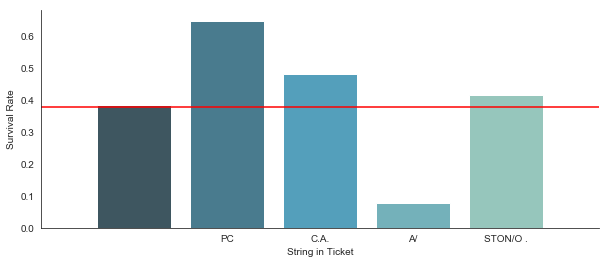

In [21]:
j = []
k = []

for i in slicer:
    print('Testing for {}'.format(i))
    print('Number of data: {}'.format(sum(converted_ticket == i)))
    j.append(i)
    try:
        survival_rate = train_df[converted_ticket == i].Survived.value_counts(normalize=True).loc[1]
        print('P(Survival) = {:.0%}'.format(survival_rate))
        k.append(survival_rate)
        
    except:
        print('The rate of survival is 0')
        k.append(0)
        
    print('-'*20)

f, axis = plt.subplots(figsize=(10,4))
a1 = sns.barplot(j,k,palette='GnBu_d')
sns.lineplot(range(-1,len(j) + 1),[.38 for j in range(len(j) + 2)],color='red')
a1.set_xlabel('String in Ticket')
a1.set_ylabel('Survival Rate')
a1.set_xlim(-1,5)

sns.despine()

As we already know that the rate of survival for the entire training set is 38%, the first result proves that again. The second result shows a **65% of survival rate**. Is that merely a coincidence? Does PC stands for premium class? We should see correlations between different columns later.

The rest of the results cannot prove anything due to lack of data.

In [22]:
# we convert the ticket to another column
# will use it later
converted_ticket = converted_ticket.apply(lambda x: 1 if x == 'PC ' else 0)

#### Cabin

In [23]:
Cabin_transformed = train_df.Cabin.apply(lambda x: replace_digit(str(x)))
Cabin_counts = train_df.Cabin.apply(lambda x: replace_digit(str(x))).value_counts()
Cabin_filter = Cabin_counts > 10

Cabin_transformed = Cabin_transformed.fillna('nan').apply(lambda x: x if Cabin_filter[x] else 'misc')

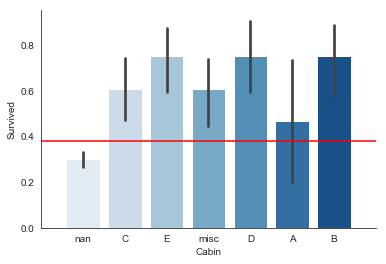

In [24]:
a = sns.barplot(Cabin_transformed,train_df.Survived, palette='Blues')
sns.lineplot(range(-1,8),[.38 for x in range(9)],color='red')

a.set_xlim(-1,7)
sns.despine()

Remember, we only have 200+ number of data in Cabin, which only takes 25% of the total.

Very interestingly, We can see the survival rates for Cabin with letters in them all exceed the overall fatality rate. The rest of records that have no Cabin data with them have a lower than overall survival rate - 30%.

#### Embarked

***********************************
Survival Rate wrt Embarked
Embarked         C        Q         S
Survived  0.553571  0.38961  0.339009
***********************************
***********************************
Embarked Count
S    646
C    168
Q     77
Name: Embarked, dtype: int64
***********************************


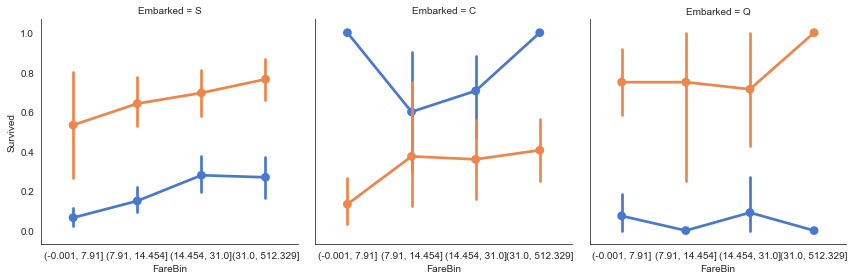

In [26]:
print('*'*35)
print('Survival Rate wrt Embarked')
print(df_EDA.pivot_table(values='Survived',columns=['Embarked']))
print('*'*35)

print('*'*35)
print('Embarked Count')
print(df_EDA.Embarked.value_counts())
print('*'*35)
g = sns.FacetGrid(df_EDA, col = 'Embarked', height =4)
g.map(sns.pointplot,'FareBin', 'Survived', 'Sex', palette='muted')

sns.despine()

- People embarked at C has a higher rate of survival. Maybe they have a better spot?
- Men's survival rate is higher than women in C.

### Correlations between data

- Chart 1: Feature Correlation w.r.t. Survival
- Chart 2: Correlations between all features

Feature Correlation WRT Survival
FamilySize        1.66%
SibSp             3.53%
AgeBin_Code       4.45%
Age               6.49%
Parch             8.16%
Title_Code        8.33%
Embarked_Code    16.77%
IsAlone          20.34%
Fare             25.73%
FareBin_Code     29.94%
Pclass           33.85%
Sex_Code         54.34%
Name: Survived, dtype: object


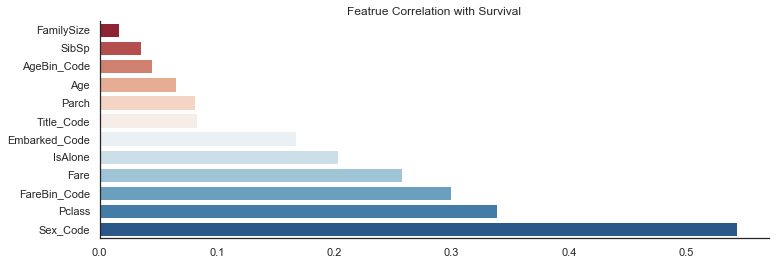

In [29]:
corr_data = (df_EDA.corr()
 .drop(['Survived','Count'])['Survived']
 .apply(abs)
 .sort_values(ascending=True)
)

print('Feature Correlation WRT Survival')
print(corr_data.apply(lambda x: '{:.2%}'.format(x)))

sns.set(style = 'white')
plt.subplots(figsize=(12,4))

ax = sns.barplot(corr_data.values,
                 corr_data.index,
                 orient='h',
                 palette='RdBu')

ax.set_title('Featrue Correlation with Survival')

sns.despine()

- Sex has the largest correlation value with survival. We've seen the difference in EDA. Expected.
- Ticket class and Fare follows. We have fare, fare bins and pclass, and all of them are social class indicators. We should the correlations between these three features.
- Is alone: this is a great column created from Parch + SibSp. Nice job.
- Embarked: we've know that people embarked at C have greater chance to survive.

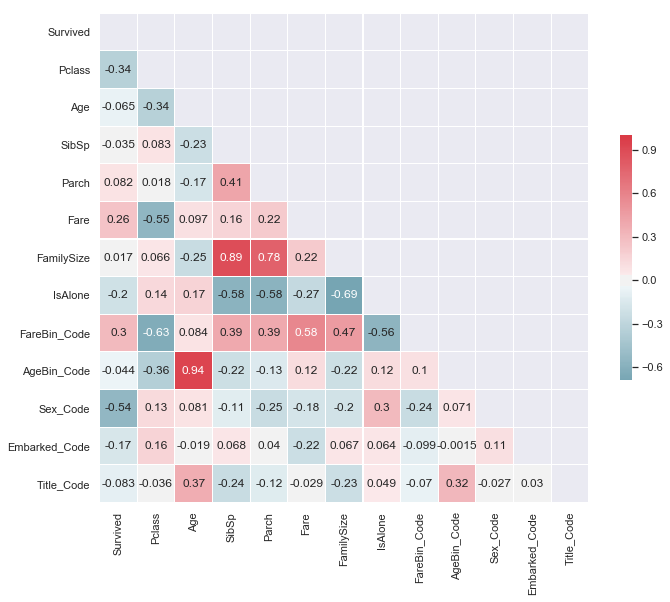

In [27]:
sns.set(style = 'darkgrid')

cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(df_EDA.drop('Count',axis=1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df_EDA.drop('Count',axis=1).corr(), 
            center=0, 
            cmap = cmap,
            square=True,
            ax=ax,
            mask = mask,
            annot=True, 
            linewidths=0.1,
            linecolor='white',
            annot_kws={'fontsize':12},
            cbar_kws={"shrink": .5})

- Family size is high correlated with SibSp and Parch. So as IsAlone.
- Age and title is correlated... Interesting
- Fare and isalone is negatively correlated... 

## Model

### Model Selection

In [31]:
for i in [X_train,X_test]:
    i.columns = ['Intercept', 'C(Sex)T.male', 'C(Embarked)T.Q', 'C(Embarked)T.S',
           'C(Title)T.Misc', 'C(Title)T.Miss', 'C(Title)T.Mr',
           'C(Title)T.Mrs', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
           'FamilySize', 'IsAlone']

Random Rorest's score: 75.59%
Random Rorest's time: 0.037
GradientBoosting's score: 81.69%
GradientBoosting's time: 0.2


D:\Anaconda\envs\py3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGB's score: 80.68%
XGB's time: 0.11
LogisticRegression's score: 81.69%
LogisticRegression's time: 0.35
SGD's score: 59.32%
SGD's time: 0.002
Perception's score: 73.56%
Perception's time: 0.002
BernoulliNB's score: 80.68%
BernoulliNB's time: 0.002
GaussianNB's score: 76.27%
GaussianNB's time: 0.002
SVM's score: 68.81%
SVM's time: 0.079


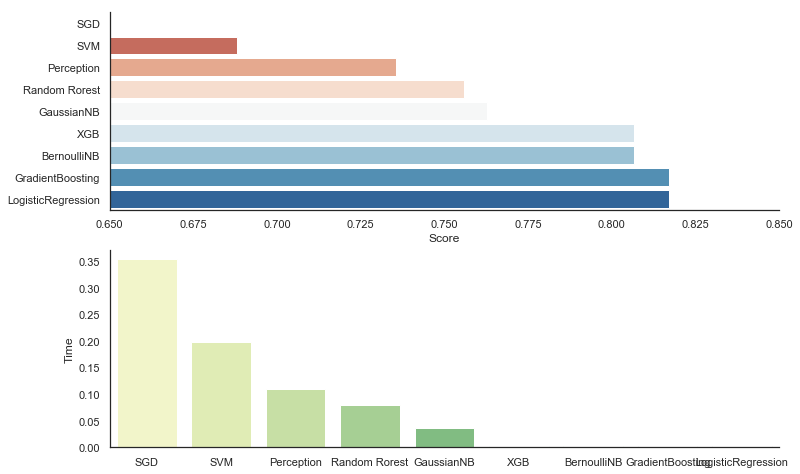

In [38]:
from xgboost import XGBClassifier
from sklearn import ensemble, linear_model, svm, naive_bayes
from sklearn.preprocessing import normalize
import time

# models
classifers = {'Random Rorest': ensemble.RandomForestClassifier(), # Ensembling Method
              'GradientBoosting': ensemble.GradientBoostingClassifier(),
              'XGB': XGBClassifier(),
              # Linear model
              'LogisticRegression': linear_model.LogisticRegressionCV(),
              'SGD': linear_model.SGDClassifier(),
              'Perception': linear_model.Perceptron(), 
              # Naive bayes
              'BernoulliNB': naive_bayes.BernoulliNB(),
              'GaussianNB': naive_bayes.GaussianNB(),
              'SVM': svm.SVC(probability=True)}

# create a loop for models to fit and generate scores
classifier_name = []
classifier_score = []
classifier_time = []

X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

for C in classifers:
    start = time.time() # time start
    classifier = classifers[C] #initializing
    classifier.fit(normalize(X_train),y_train) #fitting
    score=classifier.score(normalize(X_test),y_test) #scoring
    end = time.time() # time end
    
    timespent = end - start
    
    classifier_name.append(C)
    classifier_score.append(score)
    classifier_time.append(timespent)
    
    print("{classifier}'s score: {score:.2%}\n{classifier}'s time: {timespent:.2}"\
          .format(classifier=C,score=score,timespent=timespent))

# transform the lists to dataframes (this is not necessary)
temp = np.hstack((np.array(classifier_score).reshape(9,1),
                  np.array(classifier_time).reshape(9,1)))
score_plot = (pd.DataFrame(index=classifier_name,data=temp,columns=['Score','Time'])
              .sort_values('Score',ascending=True))

# Barplot for scores and times
f, axes = plt.subplots(2,1,figsize=(12,8))

ax1 = sns.barplot(score_plot['Score'], 
                  score_plot.index,palette='RdBu',
                  ax=axes[0])

ax1.set_xlim(.65,.85)

ax2 = sns.barplot(score_plot.index, 
                  score_plot.sort_values('Time',ascending=False)['Time'], 
                  palette='YlGn',
                  ax=axes[1])

sns.despine()

How about normalization? We did not use it in the last cell. Now, we are going to add one process to norm the data and see what we have. After we have that result, we deduct that by the last result and plot it.

Random Rorest's score: 78.98%
Random Rorest's time: 0.026
GradientBoosting's score: 82.37%
GradientBoosting's time: 0.14


D:\Anaconda\envs\py3.6\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGB's score: 83.05%
XGB's time: 0.085
LogisticRegression's score: 83.73%
LogisticRegression's time: 0.72
SGD's score: 80.68%
SGD's time: 0.002
Perception's score: 72.54%
Perception's time: 0.002
BernoulliNB's score: 80.68%
BernoulliNB's time: 0.002
GaussianNB's score: 79.66%
GaussianNB's time: 0.003
SVM's score: 70.51%
SVM's time: 0.11


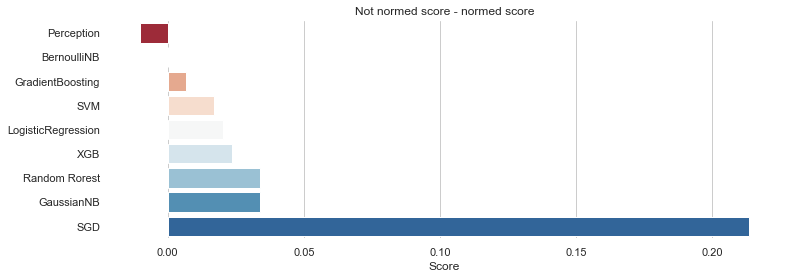

In [49]:
from xgboost import XGBClassifier
from sklearn import ensemble, linear_model, svm, naive_bayes
import time

# models
classifers = {'Random Rorest': ensemble.RandomForestClassifier(), # Ensembling Method
              'GradientBoosting': ensemble.GradientBoostingClassifier(),
              'XGB': XGBClassifier(),
              # Linear model
              'LogisticRegression': linear_model.LogisticRegressionCV(),
              'SGD': linear_model.SGDClassifier(),
              'Perception': linear_model.Perceptron(), 
              # Naive bayes
              'BernoulliNB': naive_bayes.BernoulliNB(),
              'GaussianNB': naive_bayes.GaussianNB(),
              'SVM': svm.SVC(probability=True)}

# create a loop for models to fit and generate scores
classifier_name1 = []
classifier_score1 = []
classifier_time1 = []

for C in classifers:
    start = time.time() # time start
    classifier = classifers[C] #initializing
    classifier.fit(X_train,y_train) #fitting
    score=classifier.score(X_test,y_test) #scoring
    end = time.time() # time end
    
    timespent = end - start
    
    classifier_name1.append(C)
    classifier_score1.append(score)
    classifier_time1.append(timespent)
    
    print("{classifier}'s score: {score:.2%}\n{classifier}'s time: {timespent:.2}"\
          .format(classifier=C,score=score,timespent=timespent))

# transform the lists to dataframes (this is not necessary)
temp1 = np.hstack((np.array(classifier_score1).reshape(9,1),
                  np.array(classifier_time1).reshape(9,1)))
score_plot = (pd.DataFrame(index=classifier_name1,data=temp1 - temp,columns=['Score','Time'])
              .sort_values('Score',ascending=True))

# Barplot for scores and times
sns.set_style('whitegrid')
f, axes = plt.subplots(1,1,figsize=(12,4))

ax1 = sns.barplot(score_plot['Score'], 
                  score_plot.index,palette='RdBu',
                  )
ax1.set_title('Not normed score - normed score')

sns.despine(left=True,bottom=True)

I am so confused. Why modeling on normalized dataset returns a lower score? Just look at that SGD model - WTF!! Afterall, what is SGD model??? Ok, I need some extra material regarding to SGD. Be right back.

**Support from Wei:** *SVM, Random forest and XGB might not be sensitive to feature normalize. That's because they don't have the process of "weights x features". As to why the result turns out that way, there might be two answers:*
1. *The model is not a good selection for this problem*
2. *Errors in the training process*